# Homework 9 - Future atmospheric CO2 predictions

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

In [48]:
df=pd.read_excel("CO2_emis_RCP.xlsx")
data=df.to_numpy()
time=data[:,0].astype(float)
co2rcp60=data[:,3].astype(float)  # unit: billion tonnes (10^12 kg)
co2rcp60[co2rcp60<0]=np.nan
m_air=5.148e18 # total mass of atmosphere, kg
CO2_emis_ppm=co2rcp60*1e12/m_air*(29/44)*1e6 # convert the unit: ppm/year

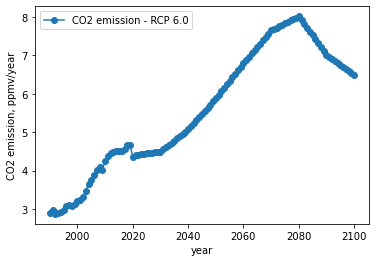

In [51]:
#genrate raw data plot
plt.figure()
plt.plot(time,CO2_emis_ppm,'o-',label='CO2 emission - RCP 6.0')
plt.xlabel('year')
plt.ylabel('CO2 emission, ppmv/year')
plt.legend()
fn='Fig_CO2_emis'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)
plt.show()

In [52]:
# define the function for dX/dt
def fun_ODE(t,X, B, F, O):
    dX_dt=B*np.cos(2*np.pi*t)+F-O
    return dX_dt

In [53]:
# Numerical solution with Euler forward method
# setup model parameters
dt=0.01 # time step 0.01 year
B=2.867*2*np.pi # respiration and photosynthesis cycles, ppmv/year
f_int = interpolate.interp1d(time, CO2_emis_ppm)
#O=2 # ocean uptake, ppmv/year

X0=349.745 # initial CO2 concentration at t0
t0=1990 # start time
t1=2100 # end time

# generate time vector
T=np.arange(t0,t1,dt)

# number of time steps
N=np.size(T)

X=0*T # initialize X values with zeros

X[0]=X0 # initial value of X

# forward Euler method
for ii in np.arange(1,N, 1):
    # ii is for the time step n+1
    F=f_int(T[ii])
    O=0.475*F
    t=T[ii]-t0 # time of current step
    # X value in the previous time step
    Xn=X[ii-1]    
    dX_dt=fun_ODE(t,Xn, B, F, O)
    X[ii]=Xn+dX_dt*dt

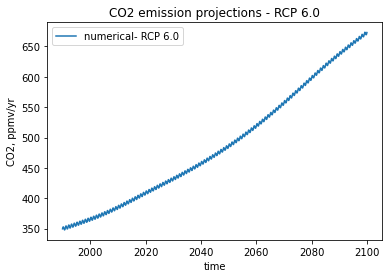

In [46]:
# generate plot
plt.figure()
#plt.plot(time[ind],co2_emis_ppm[ind],label='observed')
plt.plot(T,X,label='numerical- RCP 6.0')
plt.xlabel('time')
plt.ylabel('CO2, ppmv/yr')
plt.legend()
fn='Fig_CO2_RCP60_numerical'
plt.title('CO2 emission projections - RCP 6.0')
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)
plt.show()